In [1]:
import numpy as np
from keras import models
from keras import layers
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
train_data_2, val_data, train_labels_2, val_labels = train_test_split(train_data, train_labels, test_size=0.2)

In [3]:
print(train_labels.shape)
print(len(train_data_2))
print(len(val_data))
print(len(test_data))
print(len(train_labels_2))
print(len(val_labels))
print(len(test_labels))

(50000, 1)
40000
10000
10000
40000
10000
10000


In [4]:
train_data_2[0]

array([[[142,  99,  61],
        [137,  96,  61],
        [136,  98,  65],
        ...,
        [124,  91,  63],
        [139, 104,  77],
        [143, 105,  80]],

       [[153, 103,  69],
        [139,  98,  63],
        [138, 103,  70],
        ...,
        [109,  78,  52],
        [125,  91,  66],
        [141, 105,  81]],

       [[148,  99,  64],
        [141, 100,  65],
        [133,  97,  65],
        ...,
        [106,  76,  54],
        [106,  75,  53],
        [132,  98,  76]],

       ...,

       [[127,  94,  73],
        [154, 116,  94],
        [148, 112,  89],
        ...,
        [224, 242, 247],
        [228, 244, 246],
        [237, 249, 250]],

       [[132,  97,  73],
        [158, 117,  92],
        [151, 112,  89],
        ...,
        [225, 242, 247],
        [231, 247, 249],
        [237, 250, 251]],

       [[129,  91,  71],
        [153, 117,  93],
        [156, 121,  97],
        ...,
        [229, 243, 249],
        [232, 248, 251],
        [239, 250, 252]]

In [5]:
train_labels_2[:5]

array([[2],
       [9],
       [9],
       [4],
       [3]], dtype=uint8)

In [6]:
train_labels_2 = train_labels_2.reshape(-1,)
train_labels_2

array([2, 9, 9, ..., 4, 0, 3], dtype=uint8)

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def plot_img(X, y, index): 
    plt.figure(figsize = (3,3))
    plt.imshow(train_data_2[index])
    plt.xlabel(classes[y[index]])
    plt.show()

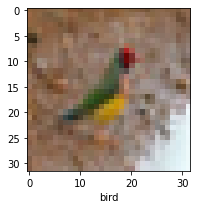

In [9]:
plot_img(train_data_2, train_labels_2, 0)

In [10]:
train_data_2 = train_data_2 / 255
test_data = test_data / 255
val_dat = val_data / 255

In [11]:
network = models.Sequential()
network.add(layers.Flatten(input_shape=(32,32,3)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))


In [12]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
train_labels_2 = to_categorical(train_labels_2)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)
test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
network.fit(train_data_2, train_labels_2, epochs=20)

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9460 - accuracy: 0.2936
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7781 - accuracy: 0.3638
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7170 - accuracy: 0.3893
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6818 - accuracy: 0.4015
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6592 - accuracy: 0.4082
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6427 - accuracy: 0.4156
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6269 - accuracy: 0.4220
Epoch 8/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6136 - accuracy: 0.4253
Epoch 9/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5994 - accuracy: 0.4338
Epoch 10/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.589

In [15]:
test_loss, test_acc = network.evaluate(val_data,  val_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 369.1311 - accuracy: 0.3117 - 412ms/epoch - 1ms/step

Test accuracy: 0.3116999864578247
